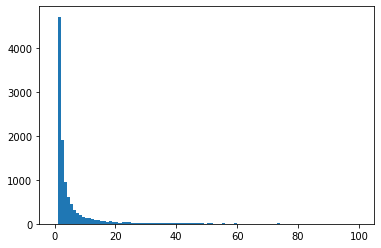

In [2]:
from  collections import Counter
import MeCab
import matplotlib.pyplot as plt 

with open("neko.txt","r",encoding="utf-8") as mecab_file:
    a=mecab_file.read()
    mecab=MeCab.Tagger()
with open("neko2.txt.mecab","w",encoding="utf-8") as mecab_file2:
    mecab_file2.write(mecab.parse(a))

with open("neko2.txt.mecab","r",encoding="utf-8") as me_file:
    keitaiso=[]
    kekka=[]
    freqs=[]
    sent=[]
    for line in me_file:
        line=line.strip("\n")
        line=line.replace(",","\t")
        items=line.split("\t")
        
        if items[0]=="EOS":
            break;
            
        keys={
            "surface":str(items[0]),
            "base":str(items[len(items)-3]),
            "pos":str(items[1]),
            "pos1":str(items[2]),
        }
        sent.append(keys)
        kekka.append(items[len(items)-3])
        if items[0]=="。":
            keitaiso.append(sent)
            sent=[]    
    freq=Counter(kekka)
    hindo=sorted(freq.items(),key=lambda x:x[1],reverse=True)
    for i in range(0,len(hindo)):
        freqs.append(hindo[i][1])
    plt.hist(freqs,range=(0,100),bins=100)